## Importing Required Libraries

In [3]:
#pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
import keras

In [36]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

## Assigning Path for Dataset

In [7]:
TRAIN_DIR = "facialimages/train"
TEST_DIR = "facialimages/test"
BATCH_SIZE=64

### Will see how many categories and images present

In [10]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1896 in folder Anger
For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Sadness
For training data, found 1922 in folder Surprise


In [12]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 237 in folder Anger
For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Happiness
For testing data, found 241 in folder Sadness
For testing data, found 241 in folder Surprise


### Will see some random images withe their labels

In [15]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [17]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


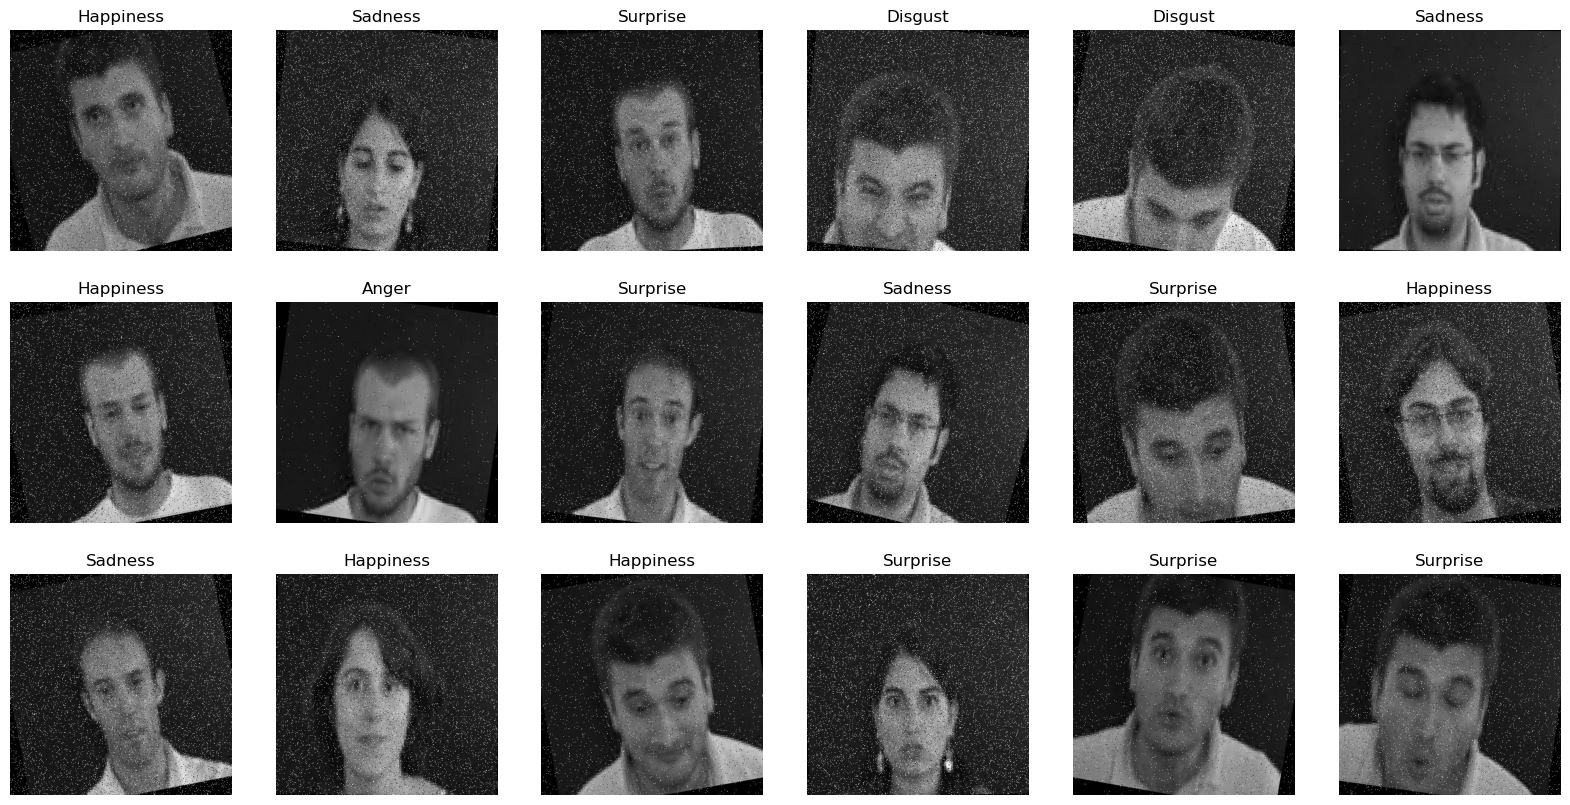

In [21]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="facialimages/train/", target_class=class_name)

### Preparing data for training

In [26]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [9]:
#from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


### Basic model building (CNN Classifier)

In [14]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import Conv2D

In [22]:
from tensorflow.keras.layers import MaxPooling2D

In [26]:
from tensorflow.keras.layers import Dense,Activation,Flatten

In [28]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
## model summary
classifier.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,692,390 (14.09 MB)

 Trainable params: 3,692,390 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
'''history = classifier.fit(training_set,
                         epochs = 20,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'
'''

Epoch 1/20
180/180 [==============================] - 695s 4s/step - loss: 1.2969 - accuracy: 0.4827 - val_loss: 1.2875 - val_accuracy: 0.4903
Epoch 2/20
180/180 [==============================] - 606s 3s/step - loss: 1.1895 - accuracy: 0.5319 - val_loss: 1.2694 - val_accuracy: 0.5014
Epoch 3/20
180/180 [==============================] - 452s 3s/step - loss: 1.1001 - accuracy: 0.5734 - val_loss: 1.1522 - val_accuracy: 0.5376
Epoch 4/20
180/180 [==============================] - 400s 2s/step - loss: 1.0340 - accuracy: 0.6023 - val_loss: 1.2325 - val_accuracy: 0.5250
Epoch 5/20
180/180 [==============================] - 260s 1s/step - loss: 0.9872 - accuracy: 0.6250 - val_loss: 0.9637 - val_accuracy: 0.6391
Epoch 6/20
180/180 [==============================] - 498s 3s/step - loss: 0.9160 - accuracy: 0.6468 - val_loss: 0.9552 - val_accuracy: 0.6182
Epoch 7/20
180/180 [==============================] - 232s 1s/step - loss: 0.8595 - accuracy: 0.6695 - val_loss: 0.9327 - val_accuracy: 0.6572

C:\Users\home\anaconda3_2\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Evaluating the model

In [13]:
#classifier.evaluate(test_set)

23/23 [==============================] - 11s 441ms/step - loss: 0.6141 - accuracy: 0.7816


[0.6141312718391418, 0.7816411852836609]

Text(0, 0.5, 'Loss')

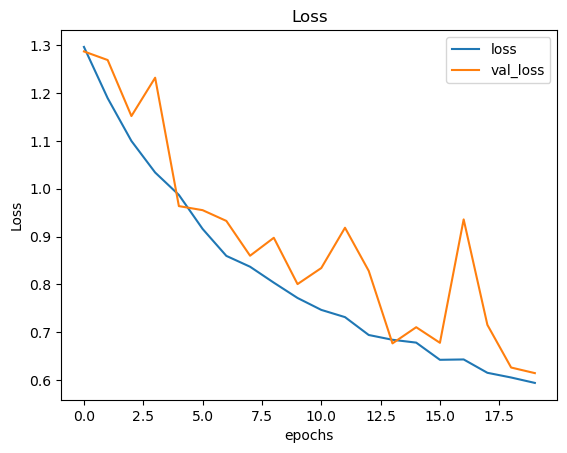

In [14]:
#pd.DataFrame(history.history)[['loss','val_loss']].plot()
#plt.title('Loss')
#plt.xlabel('epochs')
#plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

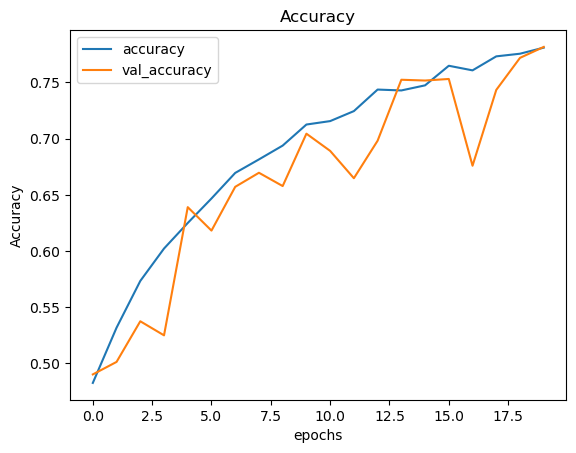

In [15]:
#pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
#plt.title('Accuracy')
#plt.xlabel('epochs')
#plt.ylabel('Accuracy')

In [32]:
import matplotlib.image as mpimg

In [13]:
#pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 660.6 kB/s eta 0:00:59
    --------------------------------------- 0.9/38.8 MB 11.8 MB/s eta 0:00:04
   -- ------------------------------------- 2.7/38.8 MB 21.5 MB/s eta 0:00:02
   ----- ---------------------------------- 5.6/38.8 MB 32.7 MB/s eta 0:00:02
   -------- ------------------------------- 7.9/38.8 MB 36.1 MB/s eta 0:00:01
   ---------- ----------------------------- 9.9/38.8 MB 37.0 MB/s eta 0:00:01
   ------------ --------------------------- 12.0/38.8 MB 46.7 MB/s eta 0:00:01
   -------------- ------------------------- 13.8/38.8 MB 46.7 MB/s eta 0:00:01
   ---------------- ----------------------- 16.5/38.8 MB 43.7 MB/s eta 0:00:01
   ------------------- -------------------- 19.0/38.8 MB 46.9 MB/s eta 0:00:01
   --------------------- ------------------ 21.3/38.8 MB 50.4 MB/s eta 0:00:01
   ------------------------ --------------- 23.8/38.8 MB 50.4 MB/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


0

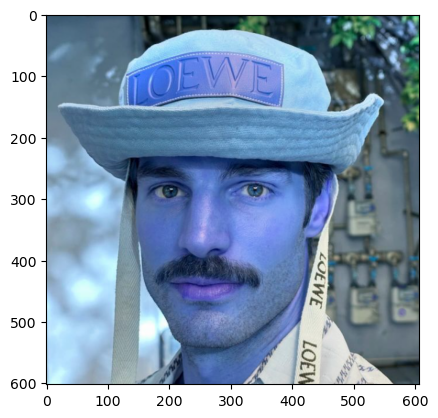

In [23]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

#image = cv2.imread("myvideo_frames0_jpg.rf.0bc0c41aed72fe013a0352f04e3a298d.jpg")
#image = cv2.imread("sad1.jpg")
image = cv2.imread("Test2/happy greece.png")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))

plt.imshow(image)

expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result


In [25]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}